# Deep Convolutional Models: Case Studies

## Why look at case studies?


- Best way to learn code is see how others write code.
- Similarly best way to learn about architectures is to look at other well-performing architectures. 
- There were a lot of efforts in what the architecture should be in connecting the basic building blocks.

Case studies we will cover:

- LeNet-5, 
- AlexNet, 
- VGG, 
- ResNet (152 layer network), 
- Inceptions

Even if you don't necessarily build computer vision systems, the ideas in these architectures are still very useful for everyone!



## Classic Networks

**LeNet-5** http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf 

Goal is to recognize hand-written gray-scale digits (32x32x1) input to 10 output.

- Uses average pooling actually (which is kinda outdated in modern days).
- On these days we always used valid convolutions which means after each layer the 2d size shrinks gradually.
- Overall 60k parameters so it is small compared to modern.
- Typical formula: conv pool conv pool fc fc output


Advanced:

- Activations used were sigmoid/tanh (not ReLU)
- To save computation they actually had super complex design of having different filters look at different channels but that's not really done anymore.
- They used non-linearity after pooling which is not frequently done anymore.



**AlexNet** https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf 

Goal is (227,227,3) input and predict 1000 classes in ImageNet.

- Similar to LeNet but much bigger.
- 60M parameters!! 
- ReLU activation function!!

Advanced:

- Complicated way to train on multiple GPUs
- Train on two GPUs 
- Local response normalization (LRN): 
    - Look at all channels and normalize for each position
    - Not really used anymore 
    - Idea is to not have maaany channels with high activation for a given pixel
    
- One of the first papers that proved DEEP LEARNING REALLY WORKS!!!



**VGG-16** https://arxiv.org/pdf/1409.1556.pdf 

Much simpler network compared to AlexNet..

- Focus on conv layers with 3x3 and pooling 2x2 and same padding so we can go deep
- Simplified the NN architectures!!
- Relatively deep network
- So many very simple straightforward layers.


Some highlights:

- Total of 138 M parameters
- 16 layers in total
- Each layer is super simple
- Double the number of channels at each CONV stack..


**!! Read the reference papers before moving to the next videos here !!**

## ResNets

Motivation. Very deep neural nets are super hard to train due to vanishing and exploding gradients. This can be mitigated by residual connections.

- With this we can train network with >100 layers.
- In a conventional net, input has to go through all layers to have effect on the output.
- Shortcut or skip-connection is other ways to refer.
- Skip connection is added BEFORE the activation of the added layer:

$$
  a^{[l]} = g(z^{[l]}+a^{[l-1]})
$$


Plain networks:

    In theory, all neural networks should have lower and lower training error when we keep on training on more layers (more capacity). In reality however, training error starts to increase after certain point .
    
ResNet:

    Training error just keeps decreasing as we keep increasing the number of layers.
    
Probably it will plateau at some point but it helps train much much deeper.

## Why ResNets work?

Imagine simple scenario. X -> Big NN -> $a^{[l]}$

Simple change add two FC layers with residual connection so we get $a^{[l+1]}$

So:

$$
a^{[l+2]} = g(z^{[l+2]}+a^{[l]})\\
= g(W^{[l+2]} a^{[l+1]} + b^{[l+2]} + a^{[l]})\\
$$

If we assume W and b will be shrinked by L2 regularization we can assume they are almost zero. So this will give:
$$
a^{[l+2]}= g(a^{[l]})\\
a^{[l+2]}= a^{[l]}\\
$$

Last part is coming from the fact that non-linearity applied to activation is itself (e.g. ReLU on activation)!! 


- This suggests that identity function is easy for Residual block to learn. So this means you are kinda guaranteed to NOT hurt the performance.
- So, with residual connection adding many layers did not hurt the performance!!
- If the added layers are actually useful, we are actually better off overall!!


Regarding dimensions:

- Since we have residual connection, we need "same" convolution a lot so that we can do elementwise addition easily.
- Other solution: if the input and output are different, we usually have an additional matrix that maps a_l to a_(l+2) dimensions. Sometimes it can be learnable weight matrix (Ws) and sometimes it can be just function to zero pad the smaller output.



In the original paper, they have many same convolution and for each pooling layer, we would need to adjust the skip connection dimensions, since pooling shrinks the size. So after each pooling layer, we have some Ws that adjust the former layer weight size to latter layer weight size.

## Networks in Networks and 1x1 Convolutions

What is the point of 1x1 convolution, isnt it just multiplication?? 


Imagine input (6x6x32) and have convolution (1x1x32) with ReLU we will have 6x6 output. If you have n filters then the output will be 6x6xn.


Idea is, it is as if we have a fully connected that is repeat across all 36 positions of the input. This is also called Network in Network.

Example where it could be useful:

- What if the channel num is getting super big? We just use 1x1x192x32 convolution to get output of 28x28x32.
- Formerly we usually shrinked h or w.
- 1D convolution helps shrinking the channel size.

## Inception Network Motivation

Instead of choosing what to do convolution (with 1x1 or 3x3 filter?) or pooling etc. just do it all!!

- At each step have multiple different kernels of sizes do convolution and max pooling at the same time.

Input: 28x28x192

- 64 1x1 filters -> 28x28x64
- 128 3x3 filters -> 28x28x128
- 32 5x5 filters -> 28x28x32
- 32 Max pooling (with stride 1) -> 28x28x32

(you do same convolution with padding to get same sizes). Concat on the last dimension to get 28x28x256. So instead of you picking what should go in each layer, just put everything in every layer haha!


**The Problem of Computational Cost**

- 5x5 same 32 -> 5x5x192 dimensional each filter
- 28x28x32 is the output: 28x28x32x5x5x192 = 120M operations!!


**Using 1x1 Convolution to reduce cost:**

Two steps:

- Use 1x1 convolution to shrunk the channel size first! This is called the bottleneck of the network.
- Then apply 5x5 32 filters.

Lets calculate the computational cost again.

- 1x1x192 each filter operation costs 28x28x192x16 = 2,408,448 computations
- Output will be 28x28x16
- Next we apply 5x5s to this result.
- 28x28x32x5x5x16 = 10M
- Total is around 12M.
- We saved computation by 10X wohoo



So one natural question: Just shrinking the channel size just like that doesn't cause performance issues? It seems that as long as it is done reasonably, we can shrink down the channels significantly without hurting the performance.

## Inception Network

Inception Module.

- Receives previous activation.
- We apply 1x1 Convolutions first then apply the 3x3 and 5x5 convolutions which are computationally expensive.
- For max pooling, we do something different.


Max pooling in inception:

- Imagine we have input to the module has 192 channels
- After applying max pooling, we still have 192 channels which might be a loooot!!
- To avoid this max pooling is followed by a 1x1 conv layer with fewer number of filters. So the output will be still 28x28 but instead of 192 channels, output of max pooling will be like small.

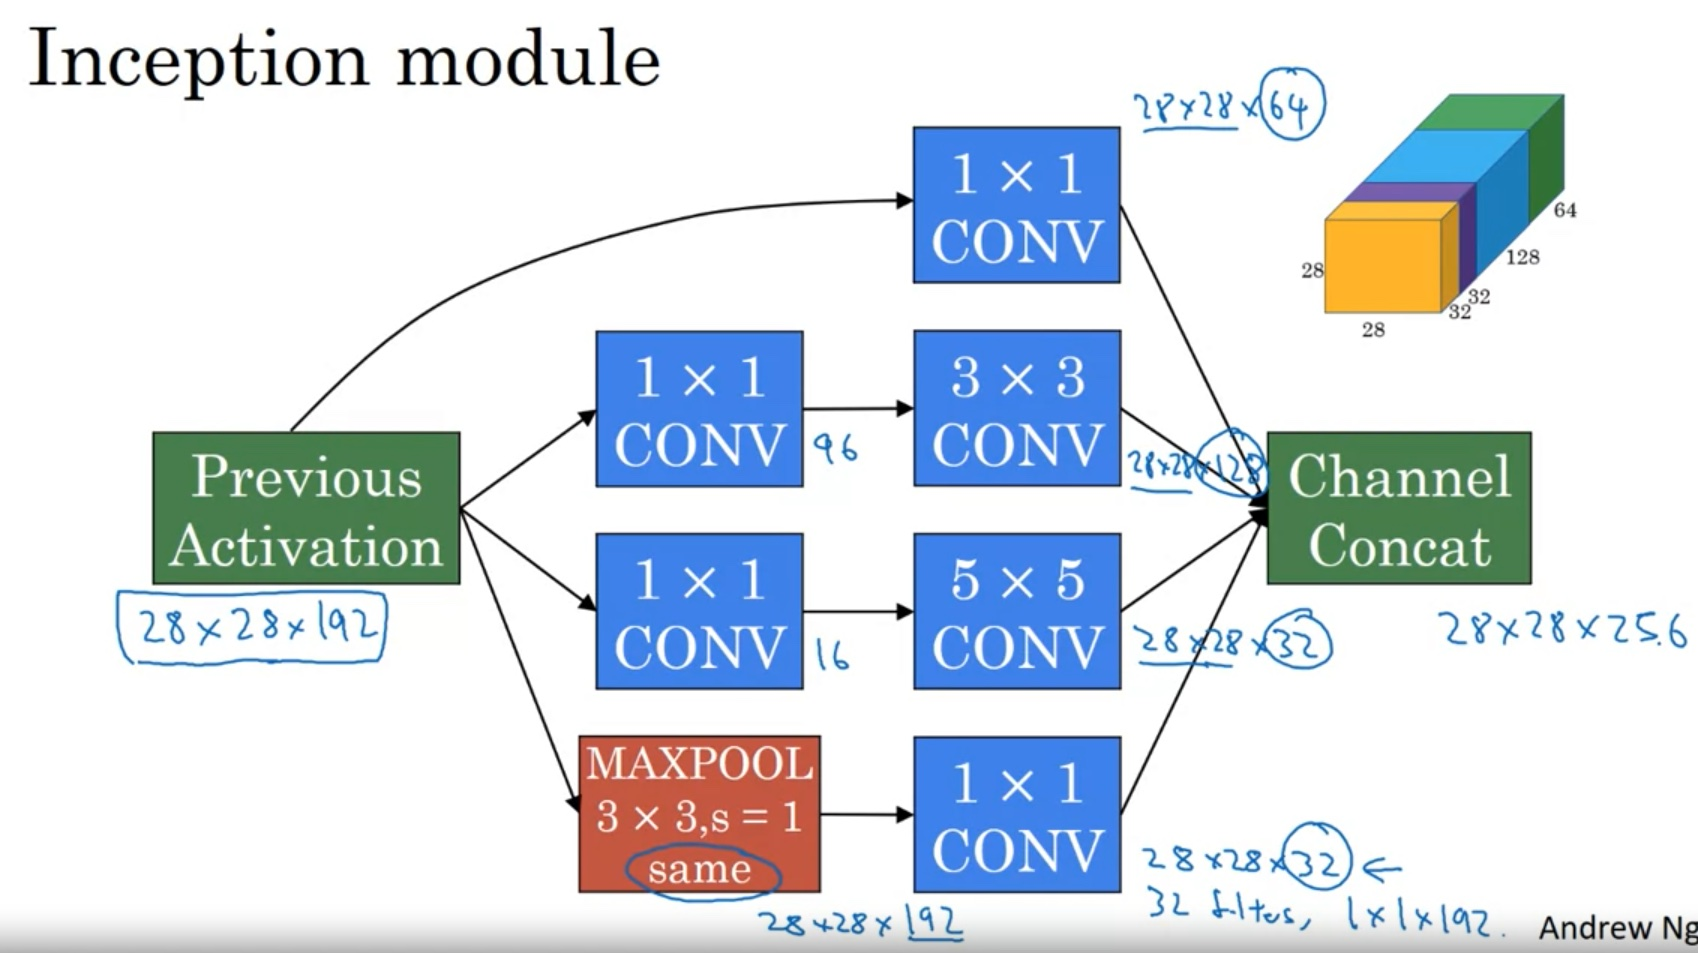

In [4]:
from IPython.display import Image
Image(filename='../../assets/inception.jpg')

Some details:

- Overall Inception Networks is a stack of Inception Module (block)
- In addition there are few pooling layers...

- Also there are some side branches, they have some hidden layers and followed by softmax.
- These side branches from the lower layers are also trained and try to predict the output.
- This shows that 1) even low layers can have high performance and 2) Has some form of regularization effect on the network. 

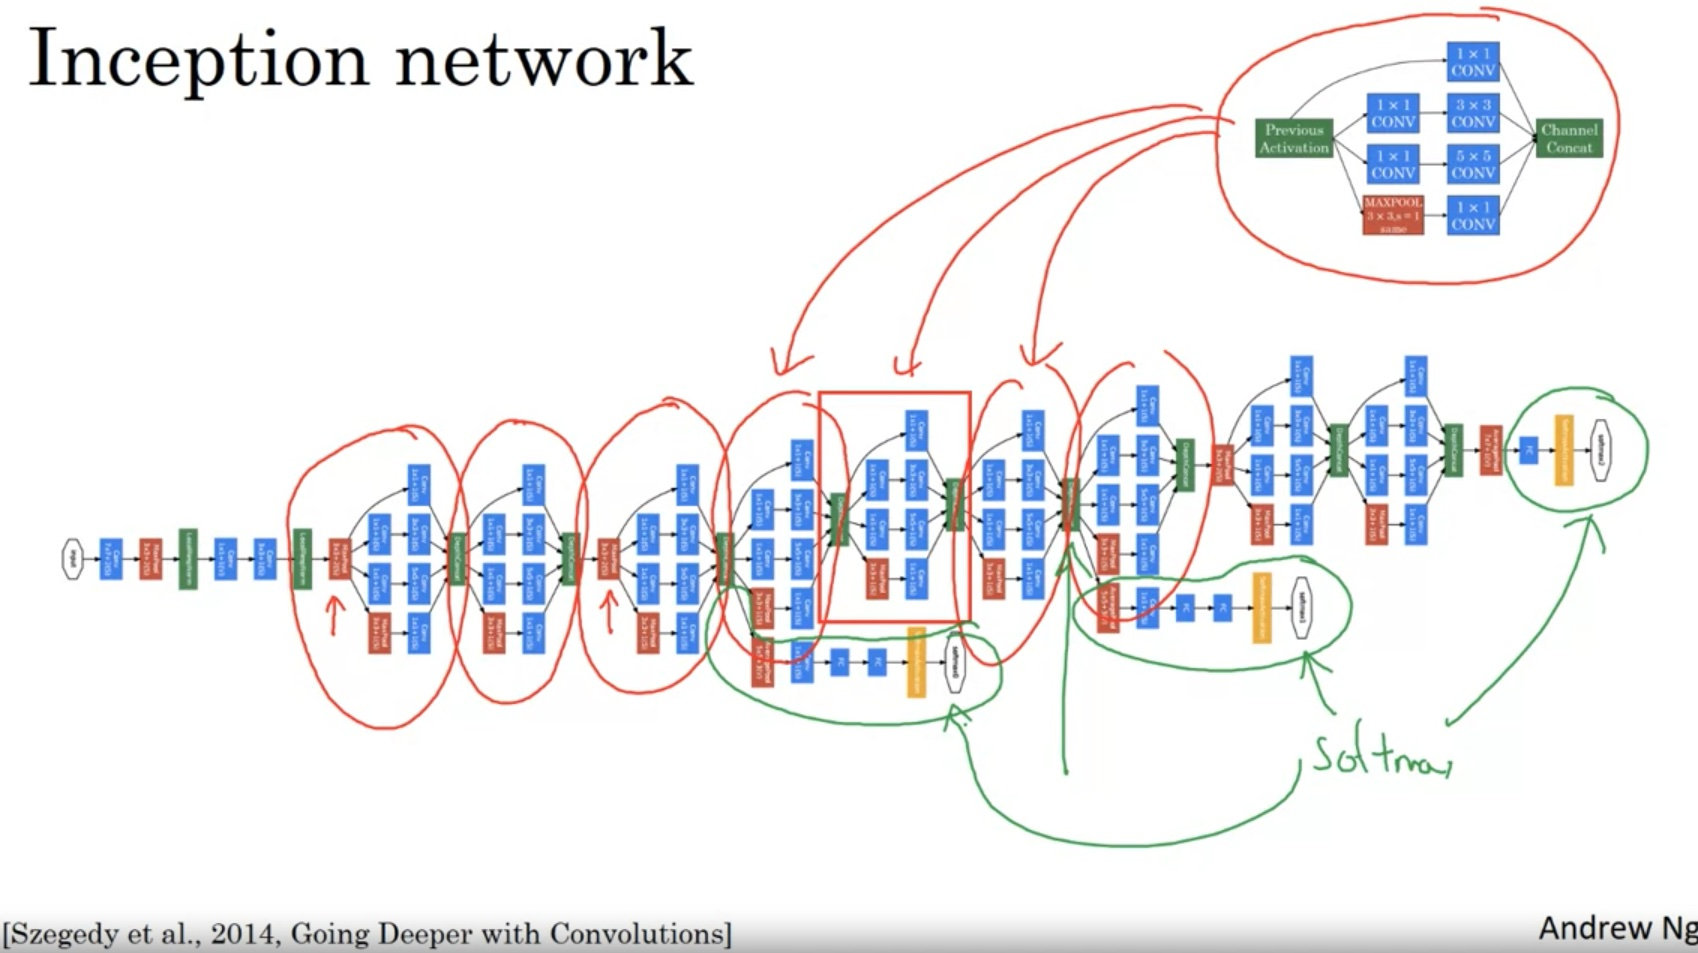

In [5]:
Image(filename='../../assets/inception-network.jpg')

- Inception Network was invented by Google and called GoogLeNet as attribute paid to Yann LeCunn.
- Name is coming from the "We Need to go Deeper" meme as the motivation!!

Reference paper: https://arxiv.org/pdf/1409.4842.pdf 

## MobileNet

- Run on your device such as low power CPU such as phone.

**Key idea: Normal vs depthwise-separable convolutions!!**

 
Instead of making expensive one step convolution with many filters, separate it into two steps:

- Depthwise Convolution 
- followed by pointwise.

**Example**.

Normal convolution.
- Input is 6x6x3
- Apply 5 3x3x3 filters
- Output is 4x4x5
- Computational cost is 4x4x5x3x3x3 = 2160!!



Depthwise step.

- Input is 6x6x3
- We have 3 filters of size 3x3 giving us output 4x4x3 (notice that the channel dim should always be identical to input here).
- Computation cost: 3x3x4x4x3 = 432


Pointwise step.
- Input is 4x4x3
- Apply 5 1x1x3 pointwise convolution filters to get output 4x4x5
- Computation cost is 3x4x4x5 = 240


So, by employing a two step procedure we obtain good inference saving!!


.Cost summary. 

- Normal convolution: 2160
- Depthwise + pointwise = 432 + 240 = 672

- So there is 3x saving!!
- Authors showed that cost saving is equal to the below:

$$
 = \dfrac{1}{n_c^{'}} + \dfrac{1}{f^2}
$$

**Proof (for the cost saving)**

Overall cost can be generalized as $f x f x d_f x d_f x M x n_c^{'}$ where $M$ is the input channel size and $d_f$ is the size of the output feature map (so if 6x6 is convolved with $f=3$ then $d_f$ would be 4). 

Depthwise cost: $f \cdot f  \cdot M \cdot d_f \cdot d_f\rightarrow \dfrac{1}{n_c^{'}}$ of overall cost

Pointwise cost: $M \cdot d_f \cdot d_f \cdot n_c^{'}\rightarrow \dfrac{1}{f^2}$ of overall cost

Summing up the costs yields the overall cost saving above.




Typical example is we have 512 channels and filters of size 3, which gives roughly:

$$
 = \dfrac{1}{512} + \dfrac{1}{9} =  \text{~9-10x savings}
$$



One more detail. 

- Remember that whatever the input channel is, depthwise should have identical number of filters. And output of depthwise is also always have the same number of channels. 

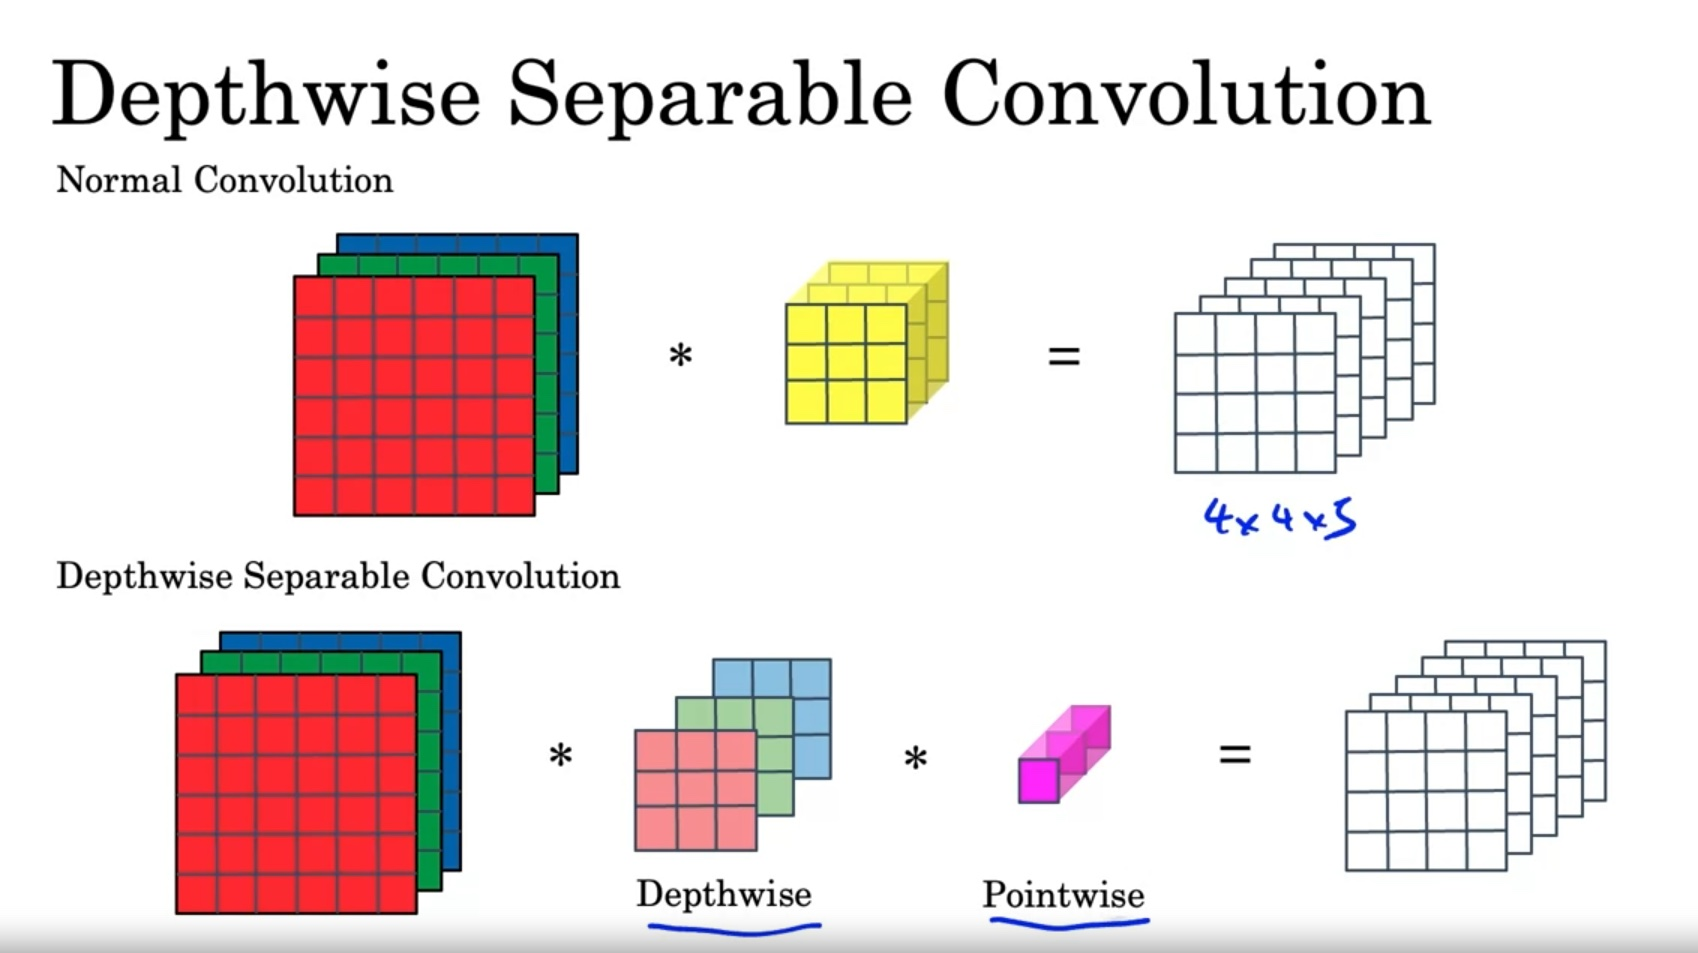

In [6]:
Image(filename='../../assets/mobilenet.jpg')

## MobileNet Architecture

Main idea is that everywhere you would use normal convolution, use the depthwise+pointwise convolution. In the original paper, they had 13 layers followed by pooling and FC and softmax as usual.!!



#### MobileNet v2

There are two main changes:

- Added the Residual connection between each depthwise+pointwise block.
- Added a new "expansion" before depthwise which we explain below.
- MobileNetv2 had 17 blocks instead of 13.


**Expansion** 

- Given an input, first apply 1D convolution with typically more 5-6 times more number of channels than the input. 
- So if the input is nxnx3 we have 15-18 filters of 1x1x3. The resulting "expanded" volume will have size nxnx18!


Steps in v2.

- Input have relatively low number of channels.
- Expansion to richer dimension (increase number of channels)
- Depthwise 
- Finally use pointwise to project it down to low channels so that computation is still efficient in the downstream bottleneck layers.

Key ideas is that

- Using expansion, we can calculate rich features.
- Using projection, we can maintain the computational efficiency.

#### v2 Bottleneck Diagram

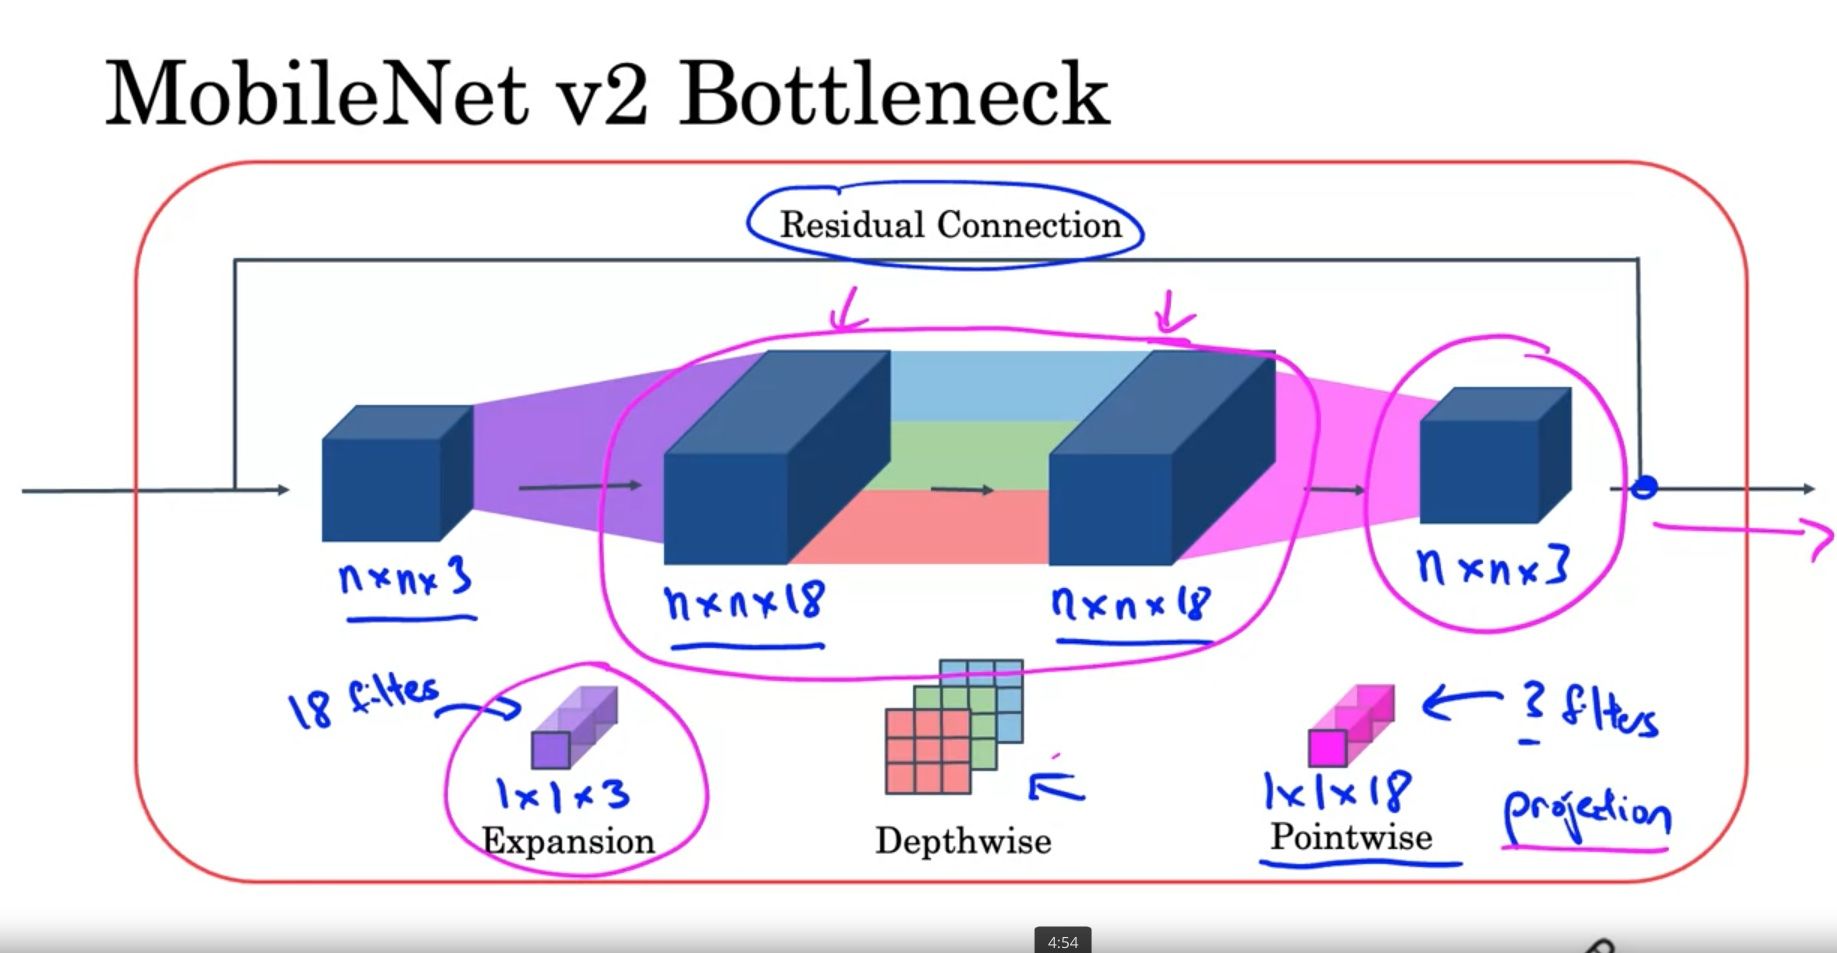

In [8]:
Image(filename='../../assets/mobilenetv2.jpg')

## EfficientNet

Idea is for different devices, can we tune our network:

- Smaller model for faster inference
- Slightly larger model if you have more compute


Given a Baseline architecture for your task you can try following things:

- r: Increase the resolution of the input
- d: Increase the depth of your network
- w: Increase the width of your network

So if you have more/less compute you need to find the optimal way of changing r,d and w. How can we know what is the best scale?


EfficientNet: Helps you find the optimal values for your given compute restraints

## Practical Advice for Using ConvNets

This section is more casual discussions so I will just take notes of all videos under this same block.

#### Key takeaways:

- Use open-source implementation:  So there are so many subtle things when training and building these neural networks such as the exact training routine, hyperparameters used etc. It might be quite a big challenge to exactly replicate a paper. Solution: Use the open-source implementations!!

- Transfer Learning: In Computer Vision, unless you have a big exception almost always please use transfer learning!

**Three shades of transfer learning**:

1. Freeze all layers and add new last layer: Use this approach when your downstream task data is very limited in size. 

**Great idea here:** If you freeze layers when fine-tuning, you can have great performance benefit by calculating the output of the frozen part of the architecture for all input samples AND save it to disk. If you have many fine-tuning iterations such as hyperparam search this will help greatly to speed up your training!!


2. Freeze first few layers and train several layers: Use this approach if you have more data!!

3. Train the whole network: Use this when you have a lot of data (enough to fine-tune the whole network).


#### Data Augmentation

Typical approaches for data augmentation includes:

- Mirroring
- Random cropping: Make sure your crop is not too small so that you miss the cat inside the picture hehe
- Color Shifting


Less used:

- Rotation
- Shearing
- Local warping


##### Color Shifting

HOW? Add different values to different RGB channels. Example: R+20, G-20,B+20, then some other sample R-20,G+20,B+20. So your training images have more diverse for different illumination and sunlight etc. Make your model more robust to color changes.


Advanced part about color shifting:

PCA Color Augmentation: Use PCA for finding the color shift values (AlexNet also uses)

Rough idea: If your image has high red and blue tints (like purple) and low green tilts, it will add and subtract more values to R and B and less to G. So that we keep the overall tilt similar to the original image Yay!


#### Implementing the distortions during Training

- Have one CPU thread that loads images from harddisk and apply the distortion and prepare a mini-batch. 
- Have a separate CPU/GPU to load the data from step 1 and do training.
- So step 1 and 2 can be done in parallel.




## State of Computer Vision

Some observations by Andrew to help navigate the literature.

Most ML problems can be plotted in the spectrum of little data to lots of data.

- Image Recognition has somewhat data
- Object detection has way less data due to bounding boxes being expensive to calculate.


Lots of data: 
- Less hand-engineering
- Simpler algorithms 
- Let the data speak


Little data:
- More hand-engineering (hacks)
- A lot of focus on neural architectures and complicated variations


Andrew argues that the data scarcity was one of the major reasons why CV area have a loooot of complicated neural architectures and a lot of focus on those. Compare it to NLP, everything is Transformers now hehe. 


Andrew also argues that there is great interest in the literature on Benchmarks!! Winning benchmark is a sure way of getting published.

So, there are a lot of (extra) details that go in to such work that try to beat a benchmark such as:

- Ensembling: Train several networks and average their outputs!
- Multi-crop at test time: Run classifier on multiple versions of the test image and average the results. Like mirror the images and crop in 4 ways each (so 1+4+1+4=10). Then average the predictions. OMG so much crazy effort...

These stuff are nice to improve performance but are barely applicable in production in real life.

